<a href="https://colab.research.google.com/github/Dhanushpb/OIBSIP/blob/main/Unemployee_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Unemployment Analysis with Python`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 13.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5


In [5]:
import os
csv_path=os.path.join(path,'Unemployment_Rate_upto_11_2020.csv')
df=pd.read_csv(csv_path)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [10]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Handle missing values (either fill or drop)
df = df.dropna()  # or df.fillna(method='ffill', inplace=True)

# Convert 'Date' column to datetime if exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean column names (remove spaces, make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [11]:
df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [14]:
df.drop(columns=['region.1',], inplace=True)


In [15]:
df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,15.9129,79.74


In [16]:
df.drop(columns=['longitude', 'latitude'], inplace=True, errors='ignore')


In [17]:
df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46


In [18]:
df=df.drop(columns=['frequency'],axis=0)

In [19]:
df.head()

,region,date,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46


In [20]:
# Numeric columns (numbers you can calculate with)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (text or category-type data)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['estimated_unemployment_rate_(%)', 'estimated_employed', 'estimated_labour_participation_rate_(%)']
Categorical Columns: ['region', 'date']


In [26]:
df['date'] = pd.to_datetime(df['date'])  # convert Date column to datetime
df['region'] = df['region'].astype('category')


In [27]:
df.head()

,region,date,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   267 non-null    category      
 1   date                                     267 non-null    datetime64[ns]
 2   estimated_unemployment_rate_(%)          267 non-null    float64       
 3   estimated_employed                       267 non-null    int64         
 4   estimated_labour_participation_rate_(%)  267 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 10.0 KB


In [29]:
# Count missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display
print("Missing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)


Missing Values:
 region                                     0
date                                       0
estimated_unemployment_rate_(%)            0
estimated_employed                         0
estimated_labour_participation_rate_(%)    0
dtype: int64

Missing Percentage:
 region                                     0.0
date                                       0.0
estimated_unemployment_rate_(%)            0.0
estimated_employed                         0.0
estimated_labour_participation_rate_(%)    0.0
dtype: float64


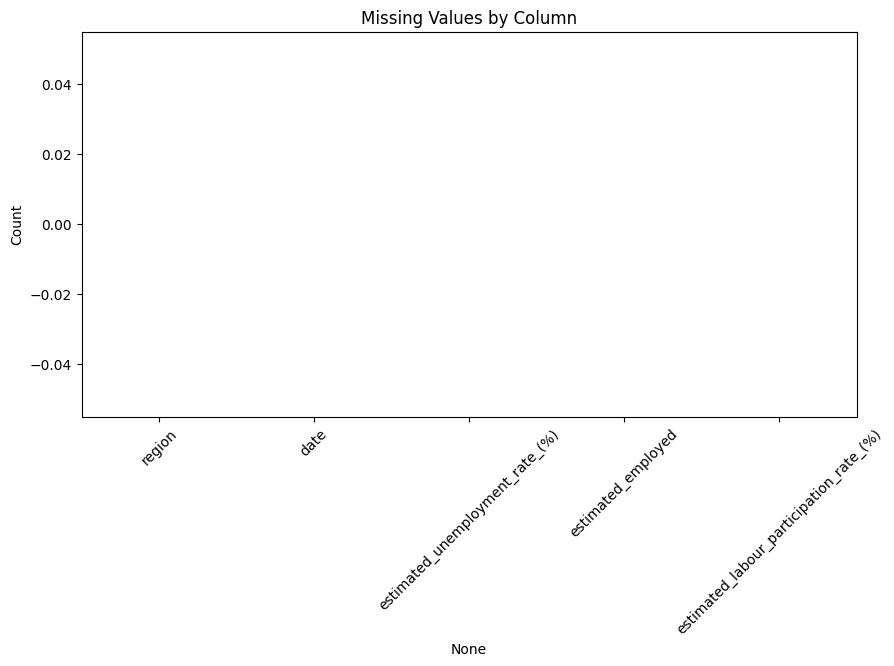

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Missing Values by Column")
plt.ylabel("Count")
plt.show()


In [31]:
# Count duplicate rows
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [39]:
df.rename(columns={
    'estimated_unemployment_rate_(%)': 'Unemployment_Rate',
    'estimated_employed': 'Employed',
    'estimated_labour_participation_rate_(%)': 'Labour_Participation_Rate'
}, inplace=True)


In [40]:
df

,region,date,Unemployment_Rate,Employed,Labour_Participation_Rate
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46
...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39
263,West Bengal,2020-07-31,6.83,35372506,46.17
264,West Bengal,2020-08-31,14.87,33298644,47.48
265,West Bengal,2020-09-30,9.35,35707239,47.73


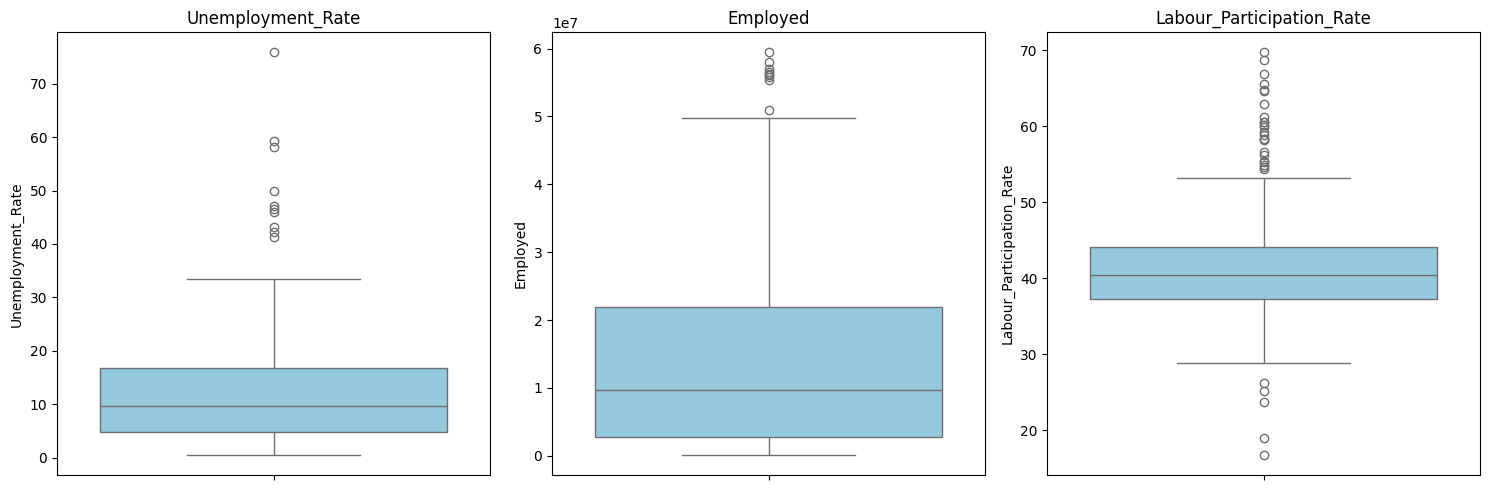

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [42]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

for col in ['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']:
    outliers = find_outliers_iqr(df, col)
    print(f"{col}: {outliers.shape[0]} outliers found")


Unemployment_Rate: 10 outliers found
Employed: 9 outliers found
Labour_Participation_Rate: 29 outliers found


In [43]:
# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract Year and Month
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()


In [44]:
df

,region,date,Unemployment_Rate,Employed,Labour_Participation_Rate,Date,Year,Month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,2020-01-31,2020,January
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,2020-02-29,2020,February
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,2020-03-31,2020,March
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,2020-04-30,2020,April
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,2020-05-31,2020,May
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,2020-06-30,2020,June
263,West Bengal,2020-07-31,6.83,35372506,46.17,2020-07-31,2020,July
264,West Bengal,2020-08-31,14.87,33298644,47.48,2020-08-31,2020,August
265,West Bengal,2020-09-30,9.35,35707239,47.73,2020-09-30,2020,September


In [45]:
bins = [0, 5, 15, 25, 100]
labels = ['Low', 'Medium', 'High', 'Very High']

df['Unemployment_Category'] = pd.cut(df['Unemployment_Rate'], bins=bins, labels=labels, right=False)


In [47]:
df = df.sort_values(by=['region', 'Date'])
df['Employment_Growth_Rate'] = df.groupby('region')['Employed'].pct_change() * 100
df['Employment_Growth_Rate'].fillna(0, inplace=True)


/tmp/ipython-input-49140619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Employment_Growth_Rate'] = df.groupby('region')['Employed'].pct_change() * 100
/tmp/ipython-input-49140619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment_Growth_Rate'].fillna(0, inplace=True)


In [51]:
df['Employment_Growth_Rate'] = df.groupby('region', observed=False)['Employed'].pct_change() * 100
df['Employment_Growth_Rate'] = df['Employment_Growth_Rate'].fillna(0)


/tmp/ipython-input-447346051.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Unemployment_Rate', ci=None, color='crimson')


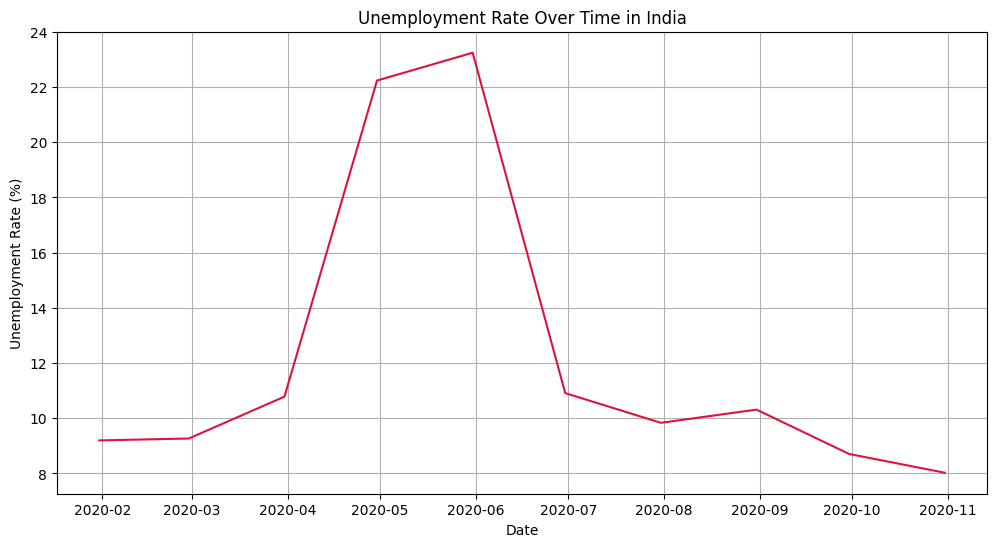

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', ci=None, color='crimson')
plt.title('Unemployment Rate Over Time in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


/tmp/ipython-input-3338781147.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_avg = df.groupby('region')['Unemployment_Rate'].mean().sort_values(ascending=False)
/tmp/ipython-input-3338781147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')


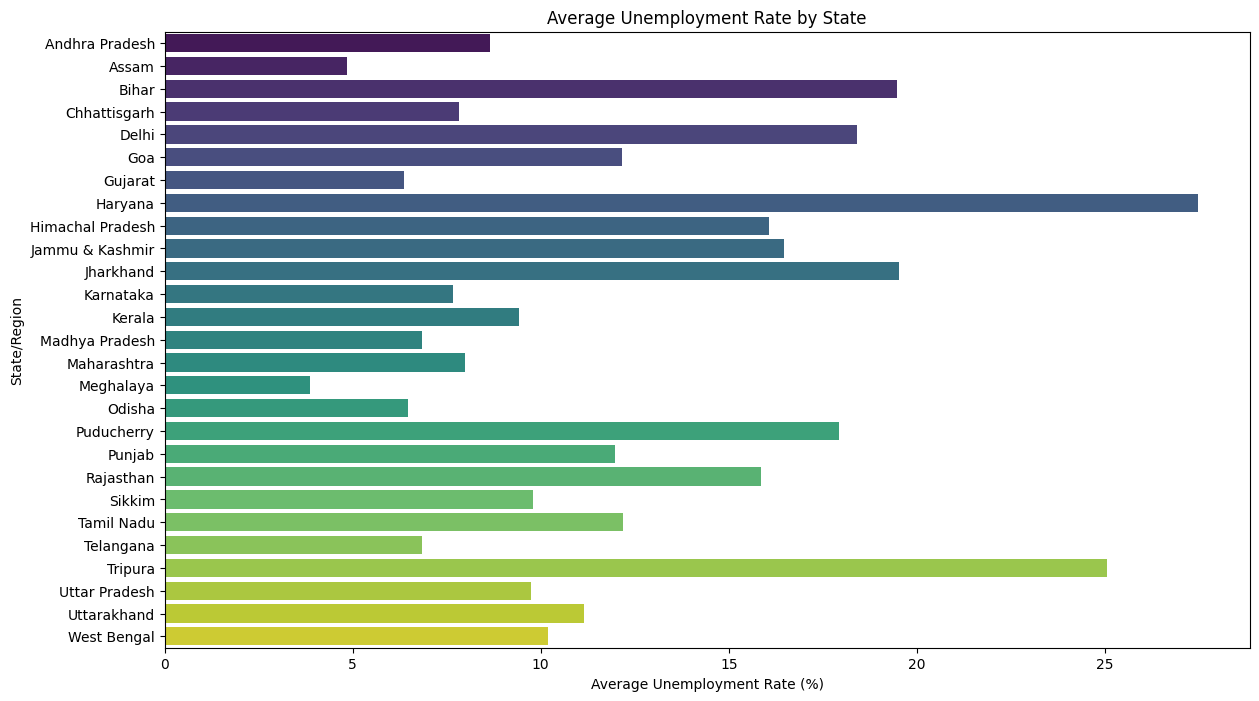

In [54]:
plt.figure(figsize=(14,8))
state_avg = df.groupby('region')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State/Region')
plt.show()


In [59]:
import pandas as pd

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create COVID period flag
df['COVID_19_Flag'] = df['Date'].apply(
    lambda x: 'Yes' if x >= pd.to_datetime('2020-04-01') else 'No'
)


In [60]:
df

,region,date,Unemployment_Rate,Employed,Labour_Participation_Rate,Date,Year,Month,Unemployment_Category,Employment_Growth_Rate,COVID_19_Flag
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,2020-01-31,2020,January,Medium,0.000000,No
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,2020-02-29,2020,February,Medium,-0.540307,No
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,2020-03-31,2020,March,Medium,-4.015889,No
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,2020-04-30,2020,April,High,-28.614254,Yes
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,2020-05-31,2020,May,High,14.571288,Yes
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,2020-06-30,2020,June,Medium,8.356533,Yes
263,West Bengal,2020-07-31,6.83,35372506,46.17,2020-07-31,2020,July,Medium,15.121230,Yes
264,West Bengal,2020-08-31,14.87,33298644,47.48,2020-08-31,2020,August,Medium,-5.862921,Yes
265,West Bengal,2020-09-30,9.35,35707239,47.73,2020-09-30,2020,September,Medium,7.233313,Yes


In [61]:
df['COVID_19_Flag'].value_counts()


,count
COVID_19_Flag,
Yes,188
No,79
